In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [50]:
def MiniBatch_GD(X,Y,alpha,epochs,batchsize,shuffle,stopping_threshold=0.01):
  #Defines
  thetas,hypotheses,costs=[],[],[]
  theta= np.array(np.zeros((1,X.shape[1] )))
  b= batchsize
  # Shuffle
  if shuffle : X,Y=shuffle_data(X,Y)

  for epoch in range(epochs):
      for i in range(0,len(X),b):
          xbatch = X[i:i+b,:]
          ybatch = Y[i:i+b,:]

          thetas.append(theta.copy())
          #1. Calculate hypotheses(ypred)
          hypo = xbatch @ theta.T
          hypotheses.append(hypo)
          #2. Calculate cost
          cost = 1/(2*b) * sum(np.square(hypo-ybatch))
          costs.append(cost)
          #-- Stop !? --
          #if i>0:
            #if (abs(costs[i]-costs[i-1]) <= stopping_threshold) : break
          #3. Updata theta
          theta -= alpha*(1/b )* sum((hypo-ybatch) * xbatch)

  return thetas,theta,costs,hypotheses

In [69]:
def shuffle_data(X,Y):
    data=np.concatenate((X,Y),axis=1)
    np.random.shuffle(data)
    X=data[:,:-1]
    Y=data[:,-1].reshape(Y.shape[0],1)
    return  X,Y


In [70]:
def Visual_Plotting(X,Y,thetas,costs,y_pred):

  plt.plot(np.array(thetas)[:,:,0],np.array(costs))
  plt.xlabel('theta0')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array(thetas)[:,:,1],np.array(costs))
  plt.xlabel('theta1')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array( costs),)
  plt.xlabel('epochs')
  plt.ylabel('cost')
  plt.show()

  plt.scatter(X[:,1],Y)
  plt.plot(X[:,1],y_pred)
  plt.xlabel('X')
  plt.ylabel('Y predict')
  plt.show()


In [71]:
def Run_MiniBatch_GD(X,Y,alpha,epochs,batchsize,shuffle):
   thetas,theta,costs,hypotheses = MiniBatch_GD(X,Y,alpha,epochs,batchsize,shuffle,stopping_threshold=1e-3)
   y_pred = X @ theta.T

   print(f'R2 Score = ',r2_score(Y, y_pred))
   Visual_Plotting(X,Y,thetas,costs,y_pred)


# Test Example

In [14]:
X_= np.array(np.random.randint(21,size=20)).reshape(20,1)
Y= (-2* X_) + 1


X0=np.array(np.ones( (X_.shape[0],1 )))
X= np.concatenate((X0,X_),axis=1)
print(X.shape)
print(Y.shape)


(20, 2)
(20, 1)


R2 Score =  0.9979713032871365


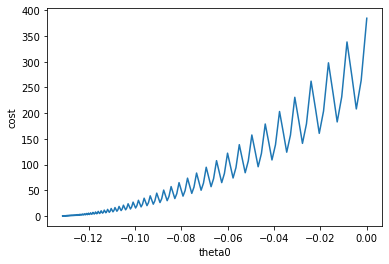

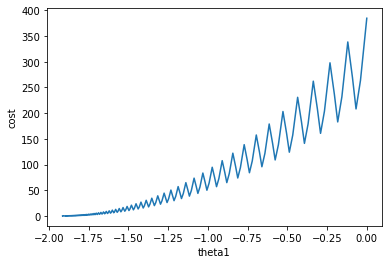

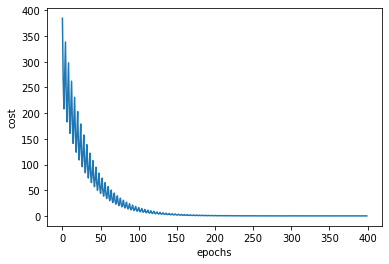

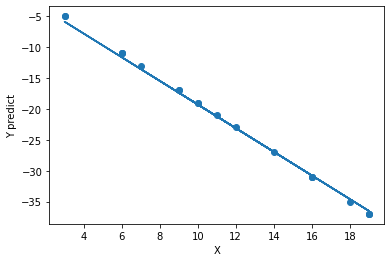

In [72]:
Run_MiniBatch_GD(X,Y,alpha=0.0001,epochs=100,batchsize=5,shuffle=True)